In [3]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL of the 2023 FedEx Cup Playoffs Wikipedia page
url = 'https://en.wikipedia.org/wiki/2023_FedEx_Cup_Playoffs'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing the FedEx Cup Playoffs data
# Assuming the data is in the table with class 'wikitable'
table = soup.find('table', {'class': 'wikitable'})

# Extract table data into a list of lists
data = []
for row in table.find_all('tr'):
    row_data = [cell.get_text(strip=True) for cell in row.find_all(['th', 'td'])]
    if row_data:
        data.append(row_data)

# Display the first 10 rows as a table using pandas
df = pd.DataFrame(data[1:], columns=data[0])
display(df.head(10))

# Save the data to a CSV file
csv_filename = 'CSC221-webscrape-data.csv'
df.to_csv(csv_filename, index=False)

print(f"Data saved to {csv_filename}")

,Place,Player,Points,Events,Bonus ($)
0,1,Jon Rahm,"3,320",17,"4,000,000"
1,2,Scottie Scheffler,"3,146",20,"3,000,000"
2,3,Rory McIlroy,"2,304",15,"2,400,000"
3,4,Max Homa,"2,128",21,"2,200,000"
4,5,Wyndham Clark,"1,944",25,"2,000,000"
5,6,Brian Harman,"1,827",24,"1,700,000"
6,7,Viktor Hovland,"1,795",20,"1,400,000"
7,8,Keegan Bradley,"1,774",20,"1,200,000"
8,9,Rickie Fowler,"1,732",22,"1,100,000"
9,10,Tony Finau,"1,655",21,"1,000,000"


Data saved to CSC221-webscrape-data.csv


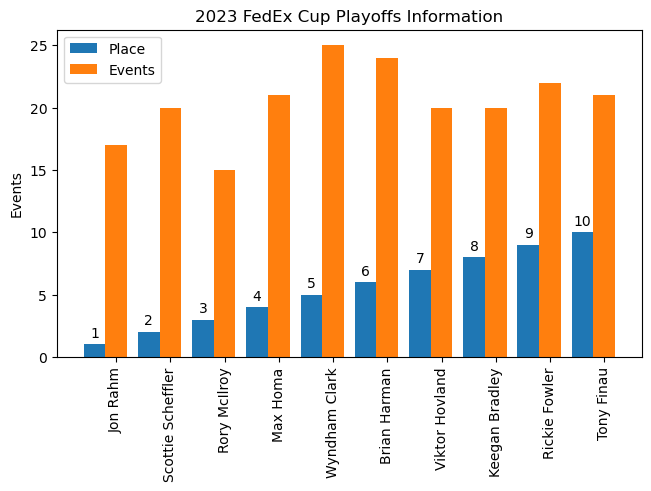

In [4]:
import matplotlib.pyplot as plt
import numpy as np
df['Events'] = pd.to_numeric(df['Events'])
df['Place'] = pd.to_numeric(df['Place'])

x = np.arange(len(df['Player'])) 
width = 0.4 
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for col, val in df[['Place', 'Events']].items():
    offset = width * multiplier
    rects = ax.bar(x + offset, val, width, label=col)
    if col != 'Events':
        ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Events')
ax.set_title('2023 FedEx Cup Playoffs Information')
ax.set_xticks(x + width, df['Player'])
ax.set_xticklabels(df['Player'], rotation=90)
ax.legend()
plt.show()
